***Univariate Linear Regression***

In [2]:
# Task-1
# Load Dataset
import pandas as pd
df = pd.read_csv('headbrain.csv')
df.head()
# Computing X and y
X = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

In [3]:
# Calculate Parameters
import numpy as np
X_sum = np.sum(X)
X_squared_sum = np.sum(X**2)
n = len(X)
print("Sum of X: ", X_sum)
print("Sum of X^2: ", X_squared_sum)
print("Number of elements in X: ", n)

Sum of X:  861256
Sum of X^2:  3161283190
Number of elements in X:  237


In [4]:
# Estimate parameters
import numpy as np
n = len(X)
# Calculating cross validation and derivation about x
number = n*np.sum(X*y)-np.sum(X)*np.sum(y)
denominator = n*np.sum(X**2)-(np.sum(X))**2
w1 = number/denominator
w0 = np.mean(y)-w1*np.mean(X)
print("w0: ", w0)
print("w1: ", w1)

w0:  325.5734210494428
w1:  0.2634293394893993


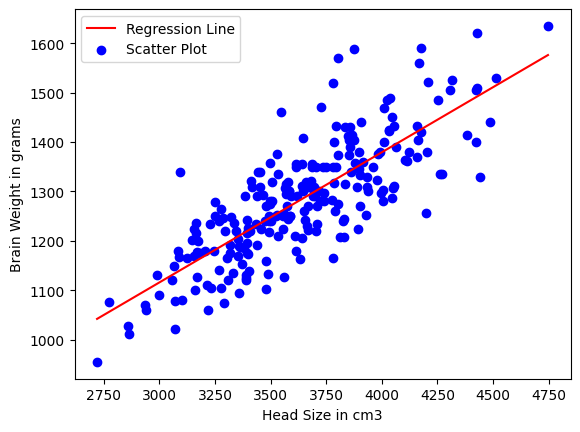

In [5]:
# Plot Regression line
import matplotlib.pyplot as plt
max_x = np.max(X)
min_x = np.min(X)
# Calculating line values x and y
x1 = np.linspace(min_x, max_x)
y1 = w0 + w1 * x1
# Ploting Line
plt.plot(x1, y1, color='red', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, y, c='blue', label='Scatter Plot')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [6]:
# Calculate RMSE value
rmse = 0
for i in range(n):
    y_pred = w0 + w1*X[i]
    rmse += (y[i] - y_pred) ** 2

rmse = np.sqrt(rmse/n)  
print("RMSE: ", rmse)

RMSE:  72.1206213783709


In [7]:
# Calculate R2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = w0 + w1*X[i]
    ss_tot += (y[i] - np.mean(y)) ** 2
    ss_res += (y[i] - y_pred) ** 2

r2 = 1 - (ss_res/ss_tot)
print("R2 Score: ", r2)

R2 Score:  0.6393117199570003


**Univariate Regression**

In [8]:
import matplotlib.pyplot as plt
from scipy import stats
# Input Data
X = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]
# Perform univariate regression
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
# Define a function for regression line
def predict(x):
    return slope * x + intercept
# Generate predicted values using regression line
mymodel = list(map(predict, X))

R2 Score:  -0.758591524376155
Standard Error:  0.453536157607742


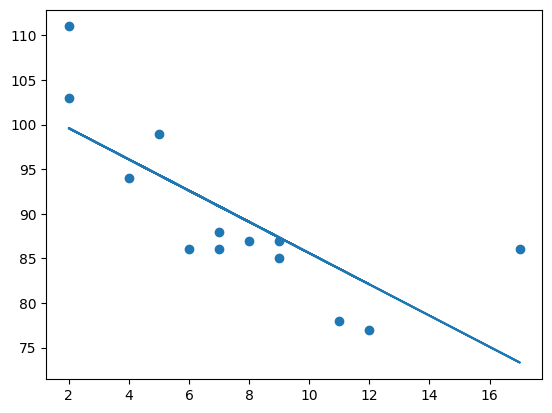

In [9]:
# Plot the data points and regression line
plt.scatter(X, y)
plt.plot(X, mymodel)
# Print the R2 score
print("R2 Score: ", r_value)
# Print standard value score
print("Standard Error: ", std_err)
# Show the plot
plt.show()

***Activity 3***

Intercept:  [4.0710858]
Coefficient:  [[2.92908701]]


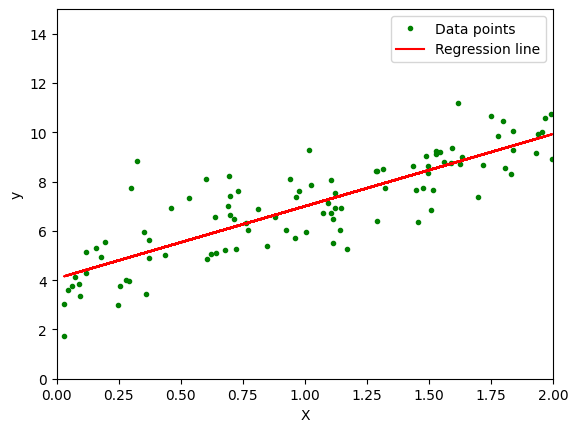

In [11]:
# Data for regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

# Fit the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Print the intercept and coefficient
print("Intercept: ", lin_reg.intercept_)
print("Coefficient: ", lin_reg.coef_)

# Predict the values
y_pred = lin_reg.predict(X)

# Plot the data points and regression line
fig,ax = plt.subplots()
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.plot(X,y,"g.", label='Data points')
ax.plot(X, y_pred, "r-", label='Regression line')
ax.legend()
plt.axis([0, 2, 0, 15])
plt.show()

***Gradiant Descent Implementation***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

#Add a column of ones to X for the bias term
X_b = np.c_[np.ones((100, 1)), X]

# Hyperparameters
eta = 0.1
n_iterations = 100

# Random initialization of theta
theta = np.random.randn(2,1)

# GRadient Descent
for iteration in range (n_iterations):
    gradients = 2/100 * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

Final Theta values: 
[[4.16104533]
 [2.81783733]]


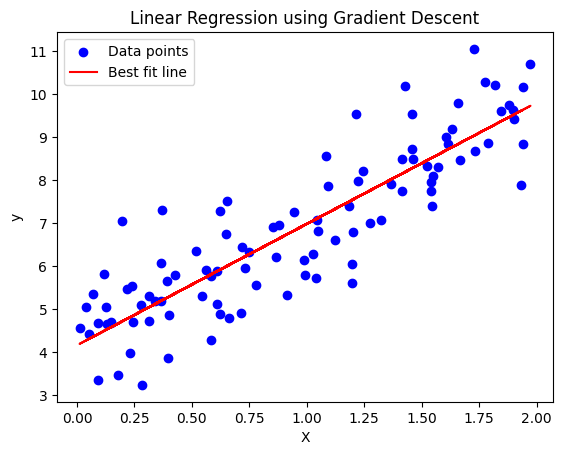

In [3]:
# Print the values of theta
print("Final Theta values: ")
print(theta)

# Plot the data and the best fit line
plt.scatter(X,y,color='blue',label='Data points')
plt.plot(X, X_b.dot(theta), color='red', label='Best fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression using Gradient Descent')
plt.show()

***Submission Activity 2***

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate sample data of 500
np.random.seed(42)
X = 2 * np.random.rand(500, 1)
y = 4 + 3 * X + np.random.randn(500, 1)

# Apply closed form solution
X_b = np.c_[np.ones((500, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

def compute_predictions(X,y, theta):
    m = len(y)
    return (1/ (2*m)) * np.sum(np.square(X.dot(theta) - y))

# Estimate parameters using sklearn linear regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [10]:
# Apply gradient descendent
eta_values = [0.01, 0.05, 0.09, 0.2, 0.4, 0.7]
m = len(y)
theta_gd_results = []

for eta in eta_values:
    theta_gd = np.random.randn(2,1)
    n_iterations = 1000
    for iteration in range(n_iterations):
         gradients = (1 / m) * X_b.T @ (X_b @ theta_gd - y)
         theta_gd -= eta * gradients
    theta_gd_results.append((eta, theta_gd))

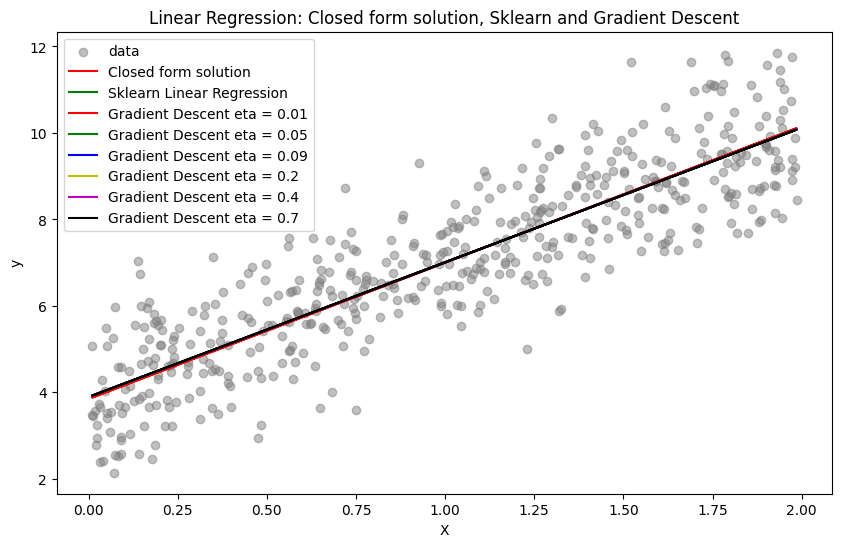

In [12]:
# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X,y, color = "gray", alpha = 0.5, label = "data")

# Plot closed form solution
plt.plot(X, X_b.dot(theta_best), color = "red", label = "Closed form solution")

# Plot sklearn linear regression 
plt.plot(X, lin_reg.predict(X), color = "green", label = "Sklearn Linear Regression")

# Plot gradient descent results
colors = ['r', 'g', 'b', 'y', 'm', 'k']
for i, (eta, theta_gd) in enumerate(theta_gd_results):
    plt.plot(X, X_b.dot(theta_gd), color = colors[i], label = f"Gradient Descent eta = {eta}")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression: Closed form solution, Sklearn and Gradient Descent")
plt.legend()
plt.show()

***Stochastic GD***

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a column for ones to X for the bias term
X_b = np.c_[np.ones((100, 1)), X]

# Hyperparameters
eta = 0.1
n_iterations = 50

# Random initialization of theta
theta = np.random.randn(2,1)

# Stochoastic Gradient Descent
for iteration in range(n_iterations):
    for i in range(100):
        random_index = np.random.randint(100)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients

Final Theta values: 
[[4.33483995]
 [2.43658052]]


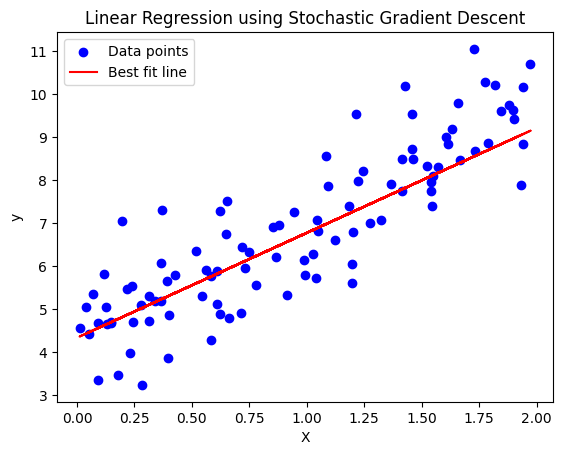

In [5]:
# Print the values of theta
print("Final Theta values: ")
print(theta)

# Plot the data and the best fit line
plt.scatter(X,y,color='blue',label='Data points')
plt.plot(X, X_b.dot(theta), color='red', label='Best fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression using Stochastic Gradient Descent')
plt.show()